In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score as r2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202507111200.pkl', 'rb'))
df

AAL_Article Count_pca_001  AAL_Article Count_pca_002  \
2018-01-03 09:45:00                  -1.030261                   0.276275   
2018-01-03 10:00:00                  -0.333511                   1.891296   
2018-01-03 10:15:00                  -0.888399                  -0.808333   
2018-01-03 10:30:00                  -0.873781                  -0.028215   
2018-01-03 10:45:00                  -0.055194                   0.608274   
...                                        ...                        ...   
2025-05-30 14:45:00                  -0.469363                  -0.189147   
2025-05-30 15:00:00                  -0.742516                  -0.443919   
2025-05-30 15:15:00                  -0.952108                   0.380691   
2025-05-30 15:30:00                  -0.700404                  -0.036676   
2025-05-30 15:45:00                  -0.985529                   0.099143   

                     AAL_Article Count_pca_003  AAL_Article Count_pca_004  \
2018-01-03 09:45:00                  -0.319170                   0.002325   
2018-01-03 10:00:00                   0.388847                   0.156446   
2018-01-03 10:15:00                  -0.778003                  -0.645095   
2018-01-03 10:30:00                  -0.678440                   0.378813   
2018-01-03 10:45:00                  -0.866039                   1.154681   
...                                        ...                        ...   
2025-05-30 14:45:00                  -1.347000                  -1.082792   
2025-05-30 15:00:00                  -0.024305                   0.231416   
2025-05-30 15:15:00                   0.280952                  -0.686945   
2025-05-30 15:30:00                  -0.361924                   0.022531   
2025-05-30 15:45:00                  -0.195268                  -0.194818   

                     AAL_Article Count_pca_005  AAL_Article Count_pca_006  \
2018-01-03 09:45:00                   0.730554                  -0.731915   
2018-01-03 10:00:00                  -0.073690                   0.886610   
2018-01-03 10:15:00                   0.253139                  -0.590556   
2018-01-03 10:30:00                  -0.468862                  -0.078955   
2018-01-03 10:45:00                   1.306107                   0.735797   
...                                        ...                        ...   
2025-05-30 14:45:00                  -0.312133                   0.669173   
2025-05-30 15:00:00                   0.498134                  -0.779294   
2025-05-30 15:15:00                  -0.266687                  -0.355548   
2025-05-30 15:30:00                  -0.663414                   0.625317   
2025-05-30 15:45:00                  -0.180856                  -0.403673   

                     AAL_Article Count_pca_007  AAL_Change_High-Low  \
2018-01-03 09:45:00                   0.534846              -0.1000   
2018-01-03 10:00:00                   1.439394              -0.1000   
2018-01-03 10:15:00                  -1.617511              -0.1300   
2018-01-03 10:30:00                  -0.033708               0.1300   
2018-01-03 10:45:00                  -0.558191              -0.0700   
...                                        ...                  ...   
2025-05-30 14:45:00                   0.667384               0.0103   
2025-05-30 15:00:00                  -0.341971              -0.0100   
2025-05-30 15:15:00                   1.278213               0.0100   
2025-05-30 15:30:00                  -0.739595              -0.0100   
2025-05-30 15:45:00                   0.388025               0.0400   

                     AAL_Change_High-Low_lag01  AAL_Change_High-Low_ma04  ...  \
2018-01-03 09:45:00                     0.2600                  0.060000  ...   
2018-01-03 10:00:00                    -0.1000                  0.037500  ...   
2018-01-03 10:15:00                    -0.1000                 -0.017500  ...   
2018-01-03 10:30:00                    -0.1300                 -0.050

In [3]:
# Data preprocessing
#tickers = ['AAL','ALGT','ALK','DAL','JBLU','LUV','UAL']
tickers = ['AAL']

y_cols = [f'{i}_Change_Volume' for i in tickers]
x_cols = [i for i in df.columns if 'lag' in i or 'pca' in i] + [
    'hour_of_day_10','hour_of_day_11','hour_of_day_12','hour_of_day_13','hour_of_day_14','hour_of_day_15','hour_of_day_9','is_close','is_open','month_of_year_1','month_of_year_10','month_of_year_11','month_of_year_12','month_of_year_2','month_of_year_3','month_of_year_4','month_of_year_5','month_of_year_6','month_of_year_7','month_of_year_8','month_of_year_9']


y = df[y_cols]
x = df[x_cols]

In [4]:
# Train/test splitting
split_val  = round(0.8 * len(x))
split_test = round(0.9 * len(x))

x_train = x[:split_val]
x_val   = x[split_val:split_test]
x_test  = x[split_test:]

y_train = y[:split_val]
y_val   = y[split_val:split_test]
y_test  = y[split_test:]

In [5]:
# Normalize the features to [0,1]
sc2 = MinMaxScaler(feature_range=(0, 1))

x_train = sc2.fit_transform(x_train)
x_val   = sc2.transform(x_val)
x_test  = sc2.transform(x_test)

In [6]:
x_train.shape

(38603, 3739)

In [7]:
y_train.shape

(38603, 1)

In [11]:
ols = LinearRegression()

ols.fit(x_train, y_train)

LinearRegression()

In [12]:
ols.score(x_val, y_val)

0.40155938775954936

In [13]:
ols.score(x_test, y_test)

0.4040228812043696

In [14]:
y_pred = ols.predict(x_val)[:,0]
plot_data = y_val.iloc[:, 0].to_frame()
plot_data['Time'] = plot_data.index
plot_data.reset_index(drop=True, inplace=True)
plot_data = pd.merge(plot_data, pd.DataFrame(y_pred, columns=['y_pred']), left_index=True, right_index=True)

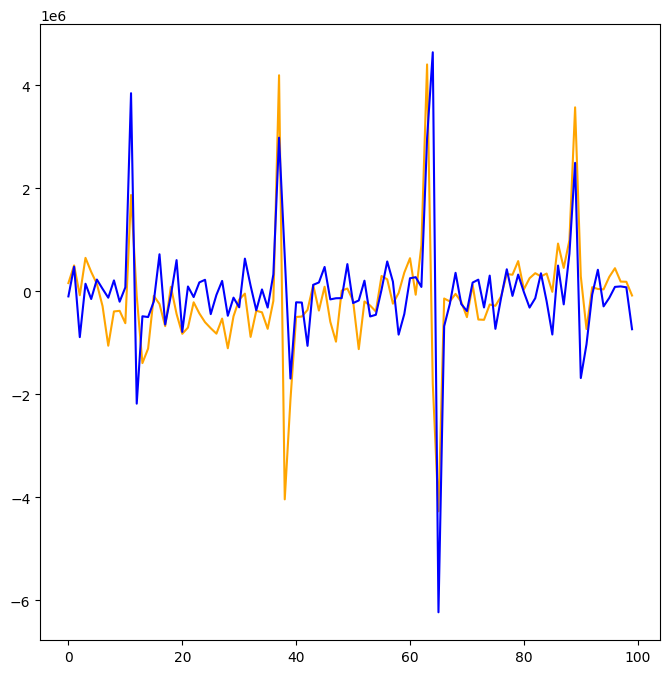

In [15]:
filter_data = plot_data.iloc[:100,:]

plt.figure(figsize=(8, 8))
plt.plot(filter_data.index, filter_data['y_pred'], label='Predicted', color='orange')
plt.plot(filter_data.index, filter_data['AAL_Change_Volume'], label='True', color='blue')

In [8]:
lasso = Lasso(
    alpha=1,
    selection='random',
)

lasso.fit(x_train, y_train)

Lasso(alpha=1, selection='random')

In [9]:
print(lasso.score(x_val, y_val))
print(lasso.score(x_test, y_test))

0.4167701743539681
0.4199121998369677


In [16]:
# Save the model
pickle.dump(ols  , open('../../output/models/ols_volume_model.pkl', 'wb'))
pickle.dump(lasso, open('../../output/models/lasso_volume_model.pkl', 'wb'))